<a href="https://colab.research.google.com/github/Azimoj/Classifier-automatiquement-des-biens-de-consommation/blob/main/Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
pip install umap-learn

In [73]:
# Data Structures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
from os import listdir

from matplotlib.image import imread
import cv2
from tqdm import tqdm
from array import array
from PIL import Image, ImageOps
from sklearn import cluster, metrics
from PIL import Image, ImageOps
import time
from PIL import ImageFilter
import time, cv2

from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA
from umap import UMAP
from sklearn.manifold import TSNE

In [74]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [75]:
flipkart= pd.read_csv('/content/drive/MyDrive/p6/flipkart_com-ecommerce_sample_1050.csv',sep=',')

In [76]:
#create category
flipkart['category']=flipkart['product_category_tree'].str.split(
    pat=">>",expand=True)[0]
flipkart["category"] = flipkart["category"].str.replace('[', "")
flipkart["category"] = flipkart["category"].str.replace('"', "")
flipkart["category"] = flipkart["category"].str.replace(' ', "")

catg  = {'HomeFurnishing':'Home',
         'Watches':'Watches',
         'HomeDecor&FestiveNeeds':'Decor',
         'Watches':'Watches',
         'BabyCare':'Baby',
         'BeautyandPersonalCare':'Beauty',
         'Computers':'Computers',
         'Kitchen&Dining':'Kitchen'}
flipkart['category'] =[catg[i] for i in flipkart['category']]
cluster  = {'Baby':0,
           'Decor':1,
           'Computers':2,
           'Watches':3,
           'Kitchen':4,
           'Home':5,
           'Beauty':6}

y_true = flipkart['category'].map(cluster)
list_labels=flipkart["category"].unique()

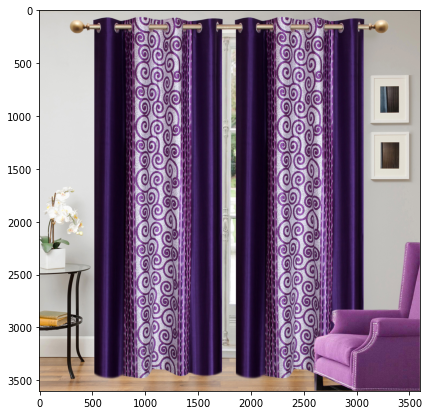

In [77]:
from PIL import Image
path = "/content/drive/MyDrive/p6/Images/"

im = Image.open(path+flipkart.image[0])

plt.figure(figsize=(7,7))
plt.imshow(im)

Home


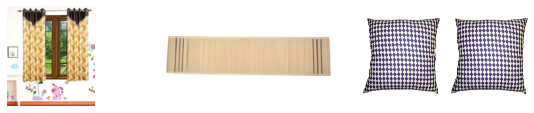

-------
Baby


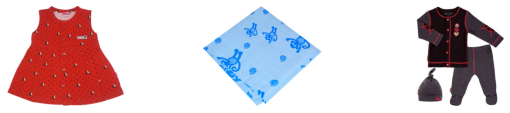

-------
Watches


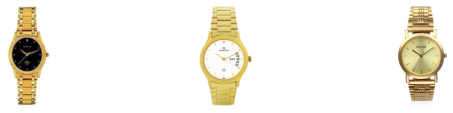

-------
Decor


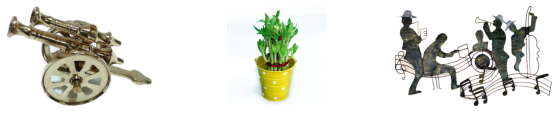

-------
Kitchen


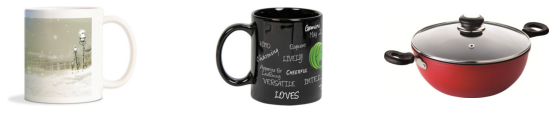

-------
Beauty


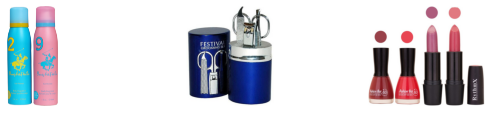

-------
Computers


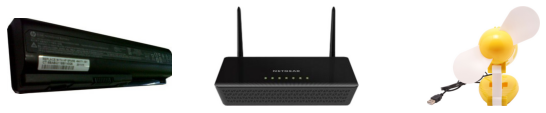

-------


In [ ]:
list_labels=flipkart["category"].unique()


for name in list_labels :
    plt.figure(figsize=(10,15))
    
    print('\033[1m' + name)
    
    for i in range(3):
        plt.subplot(7, 3, i + 1)
        for j in flipkart[flipkart["category"]==name].image.sample():
          filename = path + j
          image = imread(filename)
          plt.axis('off')
          plt.imshow(image)
         
    plt.show()
    print("-------")

The steps to be taken are :

Read image.
Resize image.
Remove noise(Denoise)
Segmentation.
Morphology(smoothing edges)

https://prince-canuma.medium.com/image-pre-processing-c1aec0be3edf

### **Image preprocessing**

* PIL (Pyhton Imaging Library)  
* OpenCV (Open Compute Vision) 



In [78]:
ima_id = '0ae859a69c7608d8197c3ba8c37bc6ec'

In [79]:
from PIL import Image, ImageOps

# Chargement de l'image en mémoire
img0 = Image.open(path +ima_id+'.jpg')

# Sauvegarde de l'image sur le disque dans le répertoire images_processed
img0.save('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_A_0.jpg', 'jpeg')

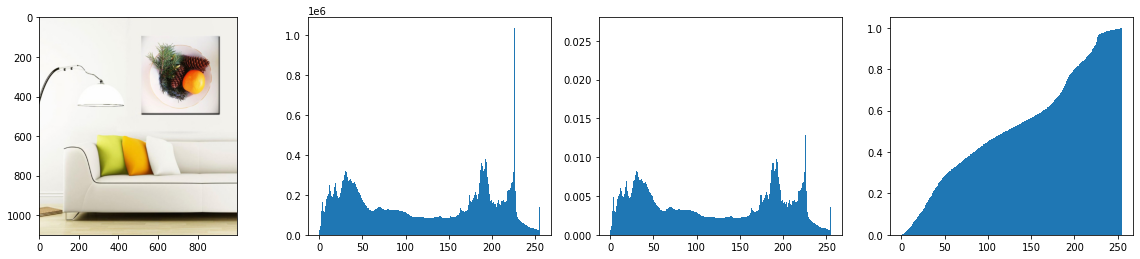

In [89]:
# Histogrammes
plt.figure(figsize=(20,4))
plt.subplot(141),plt.imshow(img0)
plt.subplot(142),plt.hist(img.flatten(), bins=range(256)) # Histogram
plt.subplot(143),plt.hist(img.flatten(), bins=range(256), density=True) # Histogramme normalize
plt.subplot(144),plt.hist(img.flatten(), bins=range(256), density=True, cumulative=True) # Histogramme cumulate
plt.show()

$\color{orange}{\text{- Prétraitement des images avec PIL}}$

In [80]:
#Conversion en niveaux de gris
gray_ = 1
if gray_ == 1:
  img1 = img0.convert('L')
elif gray_ == 0:
  img1 = img0

In [81]:
img1_num = np.array(img1)
img1.save('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_A_1.jpg', 'jpeg')

In [82]:
from PIL import ImageFilter

# Lissage par moyennage (fenêtre de taille 9)
img2a = img1.filter(ImageFilter.BoxBlur(1))
img2a_num = np.array(img2a)
img2a.save('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_A_2a.jpg', 'jpeg')

In [83]:
# Filtre gaussien
img2b = img1.filter(ImageFilter.GaussianBlur(1))
img2b_num = np.array(img2b)
img2b.save('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_A_2b.jpg', 'jpeg')

In [84]:
# Egalisation après réduction de bruit méthode 1
img3a = ImageOps.equalize(img2a, mask = None)
img3a_num = np.array(img3a)
img3a.save('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_A_3a.jpg', 'jpeg')

In [85]:
# Egalisation après réduction de bruit méthode 2
img3b = ImageOps.equalize(img2b, mask = None)
img3b_num = np.array(img3b)
img3b.save('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_A_3b.jpg', 'jpeg')

Prétraitement des images avec PIL 



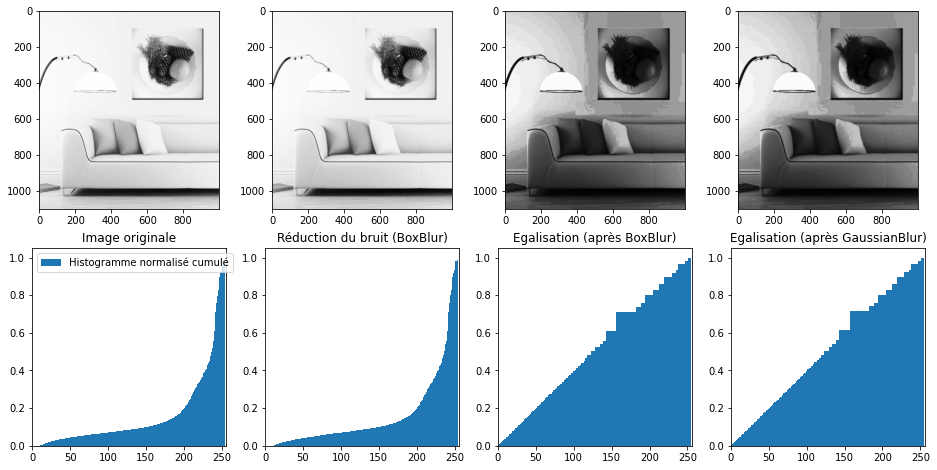

In [86]:
print('Prétraitement des images avec PIL','\n' )
plt.figure(figsize=(16,8))


plt.subplot(241),plt.imshow(img1, cmap='gray')
plt.subplot(242),plt.imshow(img2a, cmap='gray')
plt.subplot(243),plt.imshow(img3a, cmap='gray')
plt.subplot(244),plt.imshow(img3b, cmap='gray')


plt.subplot(245),plt.hist(img1_num.flatten(), bins=range(256), density=True, cumulative=True),
plt.xlim([0,256])
plt.legend(['Histogramme normalisé cumulé'], loc = 'upper left')
plt.title('Image originale')

plt.subplot(246),plt.hist(img2a_num.flatten(), bins=range(256), density=True, cumulative=True),
plt.xlim([0,256])
plt.title('Réduction du bruit (BoxBlur)')

plt.subplot(247),plt.hist(img3a_num.flatten(), bins=range(256), density=True, cumulative=True),
plt.xlim([0,256])
plt.title('Egalisation (après BoxBlur)')

plt.subplot(248),plt.hist(img3b_num.flatten(), bins=range(256), density=True, cumulative=True),
plt.xlim([0,256])
plt.title('Egalisation (après GaussianBlur)')

plt.show()

$\color{orange}{\text{- Prétraitement des images avec OpenCV}}$

In [87]:
import cv2
print('cv2',cv2.__version__)

cv2 4.1.2


In [88]:
img0 = cv2.imread(path +ima_id+'.jpg') # On charge l'image en couleur en mémoire

Conversion en niveaux de gris

In [89]:
#convert in gray
gray_ = 0

if gray_ == 1:
    img1_ = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY) # Conversion de l'image originale (couleur) en niveaux de gris
     
elif gray_ == 0:
    img1 = img0 # Image en couleur
# Display format:
       # cv2 processes images in BGR mode
    img1_ = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # Transformation BGR --> RGB

In [90]:
cv2.imwrite('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_B_1.jpg', img1) # On sauvegarde l'image sur le disque
                                                                          # dans le répertoire images_processed

True

In [91]:
hist,bins = np.histogram(img1.flatten(),256,[0,256])
cdf1 = hist.cumsum()
cdf1_normalized = cdf1 * hist.max() / cdf1.max()

In [126]:

img1 = cv2.imread('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_B_1.jpg',cv2.IMREAD_GRAYSCALE)


img2_ = cv2.adaptiveThreshold(img1,255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,#gaussian
                              cv2.THRESH_BINARY,15,3) # Image en niveaux de gris
        
cv2.imwrite('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_B_2.jpg', img2)

True

True

In [128]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf2 = hist.cumsum()
cdf2_normalized = cdf2 * hist.max() / cdf2.max()

**Egalisation méthode** 

https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

In [129]:
#Egalisation méthode 1

img2 = cv2.imread('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_B_2.jpg',0)

img3a = cv2.equalizeHist(img2)
cv2.imwrite('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_B_3a.jpg', img3a)

# Après égalisation, l'image est rendue en niveaux de gris
# Les niveaux sont inversés à l'affichage
# On utilisera donc le paramètre cmap ='gray' pour rétablir les niveaux

True

In [130]:
hist,bins = np.histogram(img3a.flatten(),256,[0,256])
cdf3a = hist.cumsum()
cdf3a_normalized = cdf3a * hist.max() / cdf3a.max()

In [131]:
# Egalisation méthode 2

img2 = cv2.imread('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_B_2.jpg',0)

# On créé un objet CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
img3b = clahe.apply(img2)
cv2.imwrite('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_B_3b.jpg', img3b)

True

In [132]:
hist,bins = np.histogram(img3b.flatten(),256,[0,256])
cdf3b = hist.cumsum()
cdf3b_normalized = cdf3b * hist.max() / cdf3b.max()

Prétraitement des images avec OpenCV 



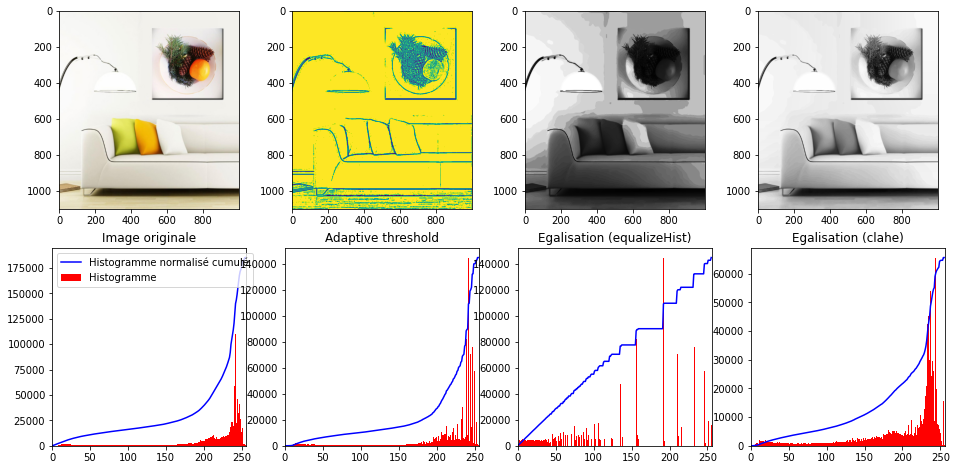

In [134]:
print('Prétraitement des images avec OpenCV','\n')

plt.figure(figsize=(16,8))

if gray_ == 1: 
    plt.subplot(241),plt.imshow(img1_, cmap='gray') # Image affichée en niveaux de gris inversés, on la redresse avec cmap
    plt.subplot(242),plt.imshow(img2_, cmap='gray')
    plt.subplot(243),plt.imshow(img3a, cmap='gray') # Image affichée en niveaux de gris inversés, on la redresse avec cmap
    plt.subplot(244),plt.imshow(img3b, cmap='gray') # Image affichée en niveaux de gris inversés, on la redresse avec cmap

elif gray_ == 0:
    plt.subplot(241),plt.imshow(img1_) # Image affichée en RGB
    plt.subplot(242),plt.imshow(img2_,, cmap='gray') # Image affichée en RGB
    plt.subplot(243),plt.imshow(img3a, cmap='gray') # Image affichée en niveaux de gris inversés, on la redresse avec cmap
    plt.subplot(244),plt.imshow(img3b, cmap='gray') # Image affichée en niveaux de gris inversés, on la redresse avec cmap
    
plt.subplot(245)
plt.plot(cdf1_normalized,color='b')
plt.hist(img1.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('Histogramme normalisé cumulé','Histogramme'), loc = 'upper left')
plt.title('Image originale')

plt.subplot(246)
plt.plot(cdf2_normalized,color='b')
plt.hist(img2.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.title('Adaptive threshold')

plt.subplot(247)
plt.plot(cdf3a_normalized,color='b')
plt.hist(img3a.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.title('Egalisation (equalizeHist)')

plt.subplot(248)
plt.plot(cdf3b_normalized,color='b')
plt.hist(img3b.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.title('Egalisation (clahe)')

plt.show()


$\color{orange}{\text{1- Rezise}}$

In [99]:
def resize_pil(im, target_width, target_height):       # Resize PIL image keeping ratio and using white background. 

    target_ratio = target_height / target_width
    im_ratio = im.height / im.width

    if target_ratio > im_ratio:
        # It must be fixed by width
        resize_width = target_width
        resize_height = int(resize_width * im_ratio)
    else:
        # Fixed by height
        resize_height = target_height
        resize_width = int(resize_height / im_ratio)

    image_resize = im.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (target_width, target_height), (255, 255, 255, 255))
    offset = (int((target_width - resize_width) / 2), int((target_height - resize_height) / 2))
    background.paste(image_resize, offset)
    return background.convert('RGB')

In [100]:
def process_pil(image_num):

    img_orig = Image.open(path+image_num).convert('L')                      # download image
    
    img = img_orig.filter(ImageFilter.GaussianBlur(radius=3))  #Gaussian blur filter.
    img = ImageOps.autocontrast(img)                           # Auto-contrast
    img = ImageOps.equalize(img)                               # Egalisation de l'histogramme
    img = img.filter(ImageFilter.BoxBlur(1))                   # Lissage pour eliminer le bruit
        
    img = resize_with_pad(img, 224,224)                        # Resize en 224*224
    img=np.array(img)

    return img_orig, img

In [101]:
def resize_cv2(img, size):                 # resize the images opencv

  h, w = img.shape[:2]
  sh, sw = size
#https://chadrick-kwag.net/cv2-resize-interpolation-methods/

  # interpolation method
  if h > sh or w > sw:                # shrinking image
      interp = cv2.INTER_AREA

  else:                               # stretching image
      interp = cv2.INTER_CUBIC

  # aspect ratio of image
  aspect = float(w)/h 
  saspect = float(sw)/sh

  if (saspect > aspect) or ((saspect == 1) and (aspect <= 1)):           # new horizontal image
      new_h = sh
      new_w = np.round(new_h * aspect).astype(int)
      pad_horz = float(sw - new_w) / 2
      pad_left, pad_right = np.floor(pad_horz).astype(int),np.ceil(pad_horz).astype(int)
      pad_top, pad_bot = 0, 0


  elif (saspect < aspect) or ((saspect == 1) and (aspect >= 1)):           # new vertical image
      new_w = sw
      new_h = np.round(float(new_w) / aspect).astype(int)
      pad_vert = float(sh - new_h) / 2
      pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
      pad_left, pad_right = 0, 0

  # scale and pad
  scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
  scaled_img = cv2.copyMakeBorder(scaled_img, 
                                  pad_top, pad_bot, pad_left, pad_right,
                                  borderType=cv2.BORDER_CONSTANT, value=255)#color white

  return scaled_img

In [102]:
 def process_cv2(img_index): 

  image = cv2.imread(path+img_index,cv2.IMREAD_GRAYSCALE)           # convert in gray
  img = resize_cv2(image, (224,224))                               # Resize en 224*224
  img = cv2.equalizeHist(img)                                       # equalize image histogram

  img = cv2.adaptiveThreshold(img, 255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,       #gaussian
                              cv2.THRESH_BINARY,15,3)
  
  # create a CLAHE object (Arguments are optional). used to improve contrast in images
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
  img = clahe.apply(img)
  return image,img

In [103]:
data_pic=flipkart[['image','category']]

In [104]:
data_pic[data_pic['image'] == '4a4ccd1ac291cfc8b3894e691a1c0f7a.jpg']

,image,category
528,4a4ccd1ac291cfc8b3894e691a1c0f7a.jpg,Watches


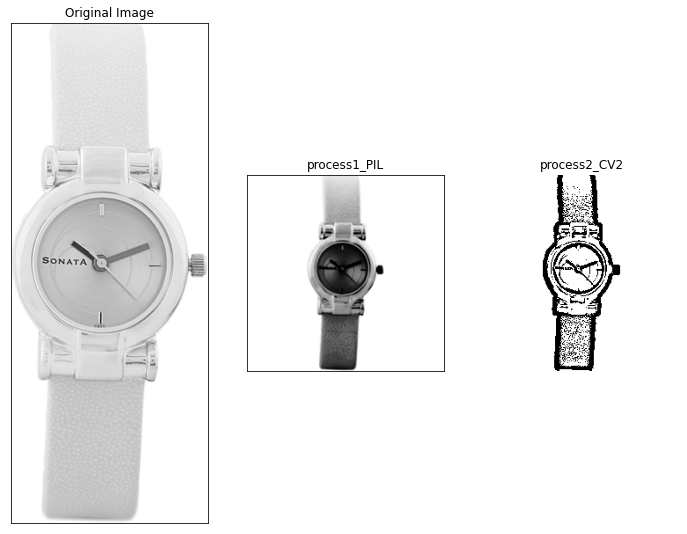

In [105]:
index=528

img_orig, img = process_pil(data_pic.image[index])
img_orig, img_cv2 = process_cv2(data_pic.image[index])

titles = ['Original Image', 'process1_PIL','process2_CV2']
images = [img_orig, img, img_cv2]
plt.figure(figsize=(12,12))

for i in range(3):

    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.axis('off')
plt.show()

**Process with PIL**

Home


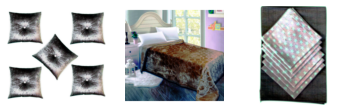

Baby


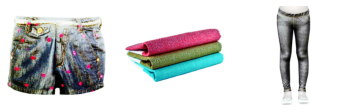

Watches


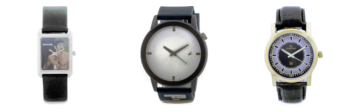

Decor


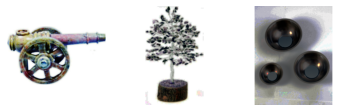

Kitchen


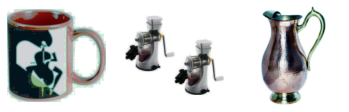

Beauty


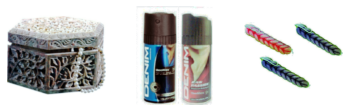

Computers


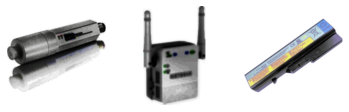

In [ ]:
for name in list_labels :
    print('\033[1m' + name)
    # print("-------")
    for i in range(3):
        plt.subplot(7, 3, i + 1)
        for j in flipkart[flipkart["category"]==name].image.sample():

          img,cl1 = process_image1(j)
          plt.axis('off')
          plt.imshow(cl1,'gray')       
    plt.show()

In [ ]:
def get_descriptors(model, process, nbr_model):
  des_list  = []
  descriptors = np.array([])

  for image_num in data_pic['image']:

        #preprocessing for image
        img_orig, img = process(image_num)

        # returns descriptors of an image
        #https://www.youtube.com/watch?v=USl5BHFq2H4&t=387s
        kp, des = model.detectAndCompute(img, None)
        
        desc = [np.zeros((nbr_model,))] if des is None else des  #Return a new array of given shape and type, filled with zeros.
        
        if len(descriptors) == 0:
          descriptors = np.array(desc)
        else:
          descriptors = np.vstack((descriptors, desc))  #Stack arrays in sequence vertically (row wise).
        # Keep track of which image a descriptor belongs to
        des_list.append(desc)
  descriptors = np.asarray(descriptors) 
  return descriptors, des_list

In [ ]:
#https://medium.com/@aybukeyalcinerr/bag-of-visual-words-bovw-db9500331b2f

def BOVW(descriptors, des_list):
  k = int(round(np.sqrt(len(descriptors)),0))
  print("Number of clusters estimated : ", k)
  print("Creation of",k, "clusters ...")

  # Clustering
  #https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
  mini_birch = MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=40)
  mini_birch.fit(descriptors)

  # Calculate the histogram of features and represent them as vector
  #vq Assigns codes from a code book to observations.
  im_features = np.zeros((len(data_pic['image']), k), "float32")
  for i in range(len(data_pic['image'])):
      des = des_list[i]
      words=mini_birch.predict(des)
      for w in words:
          im_features[i][w] += 1
  return im_features

In [ ]:
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.manifold import TSNE
# https://towardsdatascience.com/tsne-vs-umap-global-structure-4d8045acba17

def reduction(im_features):

  umap= UMAP(n_components=3,init='random', random_state=0)
  proj_umap = umap.fit_transform(im_features)

  pca = PCA(n_components=0.99)
  feat_pca= pca.fit_transform(im_features)

  Tsne = TSNE(n_components=3, init='random', random_state=0)
  proj_tsne = Tsne.fit_transform(im_features)
  return proj_umap, feat_pca, proj_tsne

In [ ]:
def evaluation(model, process, nbr_model):
  #get descriptor
  descriptors, des_list=get_descriptors(model, process, nbr_model)
  #bag of visual word
  im_features = BOVW(descriptors, des_list)
  #reduction of dimension
  proj_umap, feat_pca, proj_tsne= reduction(im_features)
  return im_features, proj_umap, feat_pca, proj_tsne

In [ ]:
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler ,MinMaxScaler,PowerTransformer

def ARI_labels(feats,y_true):
  #Applying standardisation on training feature
  feature_std= StandardScaler().fit_transform(feats)
  cls = cluster.KMeans(n_clusters=7,init ='random',max_iter= 100,n_init=5,random_state=40)
  
  km_mat=cls.fit_transform(feature_std)
  labels=cls.labels_
  ari=metrics.adjusted_rand_score(y_true, labels)
  return labels, ari,km_mat

In [ ]:
orb = cv2.ORB_create(200)

In [ ]:
# Perform k-means clustering and vector quantization
from sklearn.cluster import  Birch , MiniBatchKMeans
from scipy.cluster.vq import kmeans, vq

temps1=time.time()
# # Perform k-means clustering and vector quantization
im_features, proj_umap, feat_pca, proj_tsne = evaluation(orb, process_image1, 32)
duration1=time.time()-temps1
print("traitement kmeans times : ", "%15.2f" % duration1, "secondes")

Number of clusters estimated :  419
Creation of 419 clusters ...
traitement kmeans times :           382.43 secondes


In [ ]:
from sklearn import manifold, decomposition

print("Dimensions dataset before reduction PCA : ", im_features.shape)
print("Dimensions dataset after reduction PCA : ", feat_pca.shape)

Dimensions dataset before reduction PCA :  (1050, 419)
Dimensions dataset after reduction PCA :  (1050, 383)


In [ ]:
matrix=[im_features, proj_umap, feat_pca, proj_tsne]
ari_list=[]
for mat in matrix:
  labels, ari,km_mat=ARI_labels(mat,y_true)
  ari_list.append(ari)


In [ ]:
df_ari=pd.DataFrame([ari_list]
                    ,columns=['cluster_km','cluster_umap_km',
                    'cluster_pca_km','cluster_tsne_km',],
                    index=['ARI_SCORE'])

In [ ]:
df_ari

,cluster_km,cluster_umap_km,cluster_pca_km,cluster_tsne_km
ARI_SCORE,0.019633,0.045264,0.002961,0.012432


Text(0, 0.5, 'ARI Score')

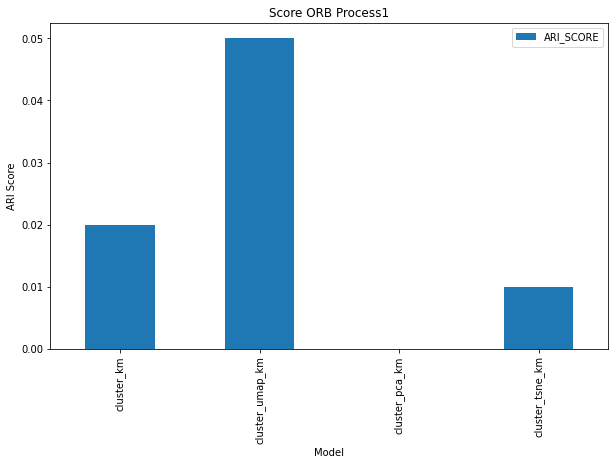

In [ ]:
df_ari.T.round(2).plot(kind="bar",figsize=(10,6))
plt.title("Score ORB Process1")
plt.xlabel("Model")
plt.ylabel("ARI Score")

In [ ]:
# Visualize with : ACP, TSNE, UMAP
#We first use PCA , TSNE ,UMAP to reduce the dataset to two dimensions by setting n_components=2.
# Then we'll visualize the features by plotting the two components against each other

from umap import UMAP
from sklearn.manifold import TSNE
def projection(im_features,feat_pca, proj_tsne,proj_umap, label_):
    #color
    cmap = plt.get_cmap('jet', 20)
    cmap.set_under('gray')
    fig, ax = plt.subplots(2, 2, figsize=(15,15))
    tsne_ = TSNE(n_components = 2, random_state=42, init='pca',# reduce to PCA components before t-SNE
                 ).fit_transform(im_features)
    ax[0,0].scatter(tsne_[:, 0], tsne_[:, 1], c=label_, cmap=cmap)
    ax[0,0].set_xlabel('TSNE_1', fontsize=12)
    ax[0,0].set_ylabel('TSNE_2', fontsize=12)
    ax[0,0].set_title('tSNE with 7 clusters', fontsize=18)
    ax[0,0].grid(True)

    #We first use PCA to reduce the dataset to two dimensions by setting n_components=2.
    # Then we'll visualize the dataset by plotting the two components against each other

    ax[0,1].scatter(feat_pca[:, 0], feat_pca[:, 1], c=label_, cmap=cmap)
    ax[0,1].set_xlabel('PCA_1', fontsize=12)
    ax[0,1].set_ylabel('PCA_2', fontsize=12)
    ax[0,1].set_title('PCA with 7 clusters', fontsize=18)
    ax[0,1].grid(True)

    #Uniform Manifold Approximation and Projection (UMAP)
    #The UMAP hyperparameter that need to be tuned to get good results:n_neighbors

    ax[1,0].scatter(proj_umap[:, 0], proj_umap[:, 1], c=label_, cmap=cmap)
    ax[1,0].set_xlabel('UMAP_1', fontsize=12)
    ax[1,0].set_ylabel('UMAP_2', fontsize=12)
    ax[1,0].set_title('UMAP with 7 clusters', fontsize=18)
    ax[1,0].grid(True)
    plt.legend(label_) 
    plt.tight_layout()
    plt.show()

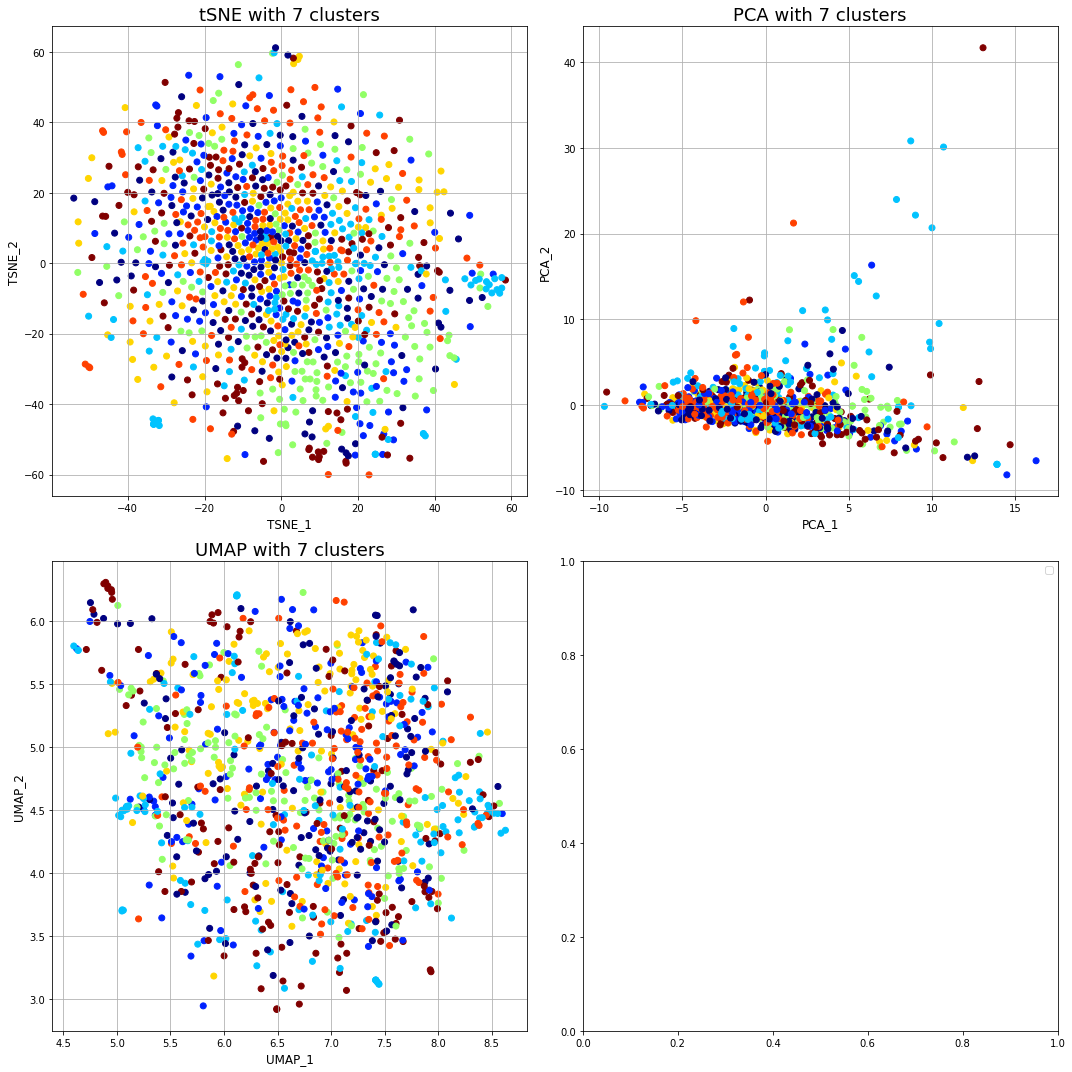

In [ ]:
projection(im_features,feat_pca, proj_tsne, proj_umap, y_true)